## I. Amazon.csv

Python Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Define Path

In [4]:
df = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\amazon_7525541.xlsx')
display(df)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


Content

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


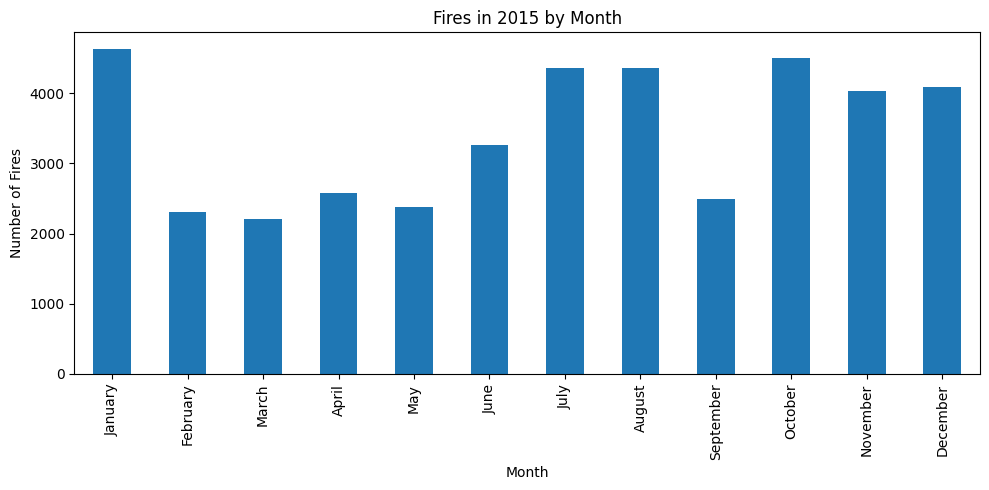

In [5]:
top_10 = df.head(10)
last_10 = df.tail(10)
shape = df.shape
info = df.info()
df.drop_duplicates(inplace=True)
nulls = df.isnull().sum()
describe = df.describe(include='all')

df['month'] = df['month'].replace({
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March',
    'Abril': 'April',
    'Maio': 'May',
    'Junho': 'June',
    'Julho': 'July',
    'Agosto': 'August',
    'Setembro': 'September',
    'Outubro': 'October',
    'Novembro': 'November',
    'Dezembro': 'December'
})

total_fires = df['number'].sum()
max_fires_month = df.groupby('month')['number'].sum().idxmax()
max_fires_year = df.groupby('year')['number'].sum().idxmax()
max_fires_state = df.groupby('state')['number'].sum().idxmax()
amazonas_total = df[df['state'] == 'Amazonas']['number'].sum()
amazonas_by_year = df[df['state'] == 'Amazonas'].groupby('year')['number'].sum()
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'] + '-01', errors='coerce')
amazonas_by_day = df[df['state'] == 'Amazonas'].groupby('date')['number'].sum()

fires_2015 = df[df['year'] == 2015].groupby('month')['number'].sum()
fires_2015 = fires_2015.reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
fires_2015.plot(kind='bar', title='Fires in 2015 by Month', figsize=(10, 5))
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.tight_layout()
plt.savefig('fires_2015.png')
plt.show()

avg_fires_by_state = df.groupby('state')['number'].mean().sort_values(ascending=False)
dec_fires_states = df[df['month'] == 'December']['state'].unique()


## II. MovieLens 25M

Python Setup

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

Define Path

In [7]:
movies = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\movies_7525528.xlsx')
ratings = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\ratings_7525529.xlsx')
tags = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\tags_7525530.xlsx')
scores_df = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\genome-scores_7525525.xlsx')
tags_df = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\genome-tags_7525526.xlsx')
links_df = pd.read_excel('C:\\Chewy School\\College\\Professional Subjects\\1st year second sem\\Datasets\\links_7525527.xlsx')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

Content

1. How many movies are released each year? What is the percentage of change over time?

In [8]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_by_year = movies['year'].value_counts().sort_index()
pct_change = movies_by_year.pct_change() * 100

plt.figure(figsize=(12, 6))
movies_by_year.plot()
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.savefig('movies_per_year.png')
plt.close()


2. What are the most popular genre of movies?

In [9]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('popular_genres.png')
plt.close()

3. Does the taste of movies changes over time?

In [10]:
movies_year_rating = pd.merge(ratings, movies[['movieId', 'year']], on='movieId')
avg_rating_by_year = movies_year_rating.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(marker='o')
plt.title('Average Movie Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.savefig('rating_trend.png')
plt.close()

4. What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [11]:
ratings_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']})
ratings_stats.columns = ['average_rating', 'rating_count']
ratings_stats = ratings_stats.sort_values(by='rating_count', ascending=False)

top_rated_movies = pd.merge(ratings_stats, movies[['movieId', 'title']], on='movieId')
top_20 = top_rated_movies[top_rated_movies['rating_count'] > 500].sort_values(by='average_rating', ascending=False).head(20)

top_20.to_csv('top_20_movies.csv', index=False)

plt.figure(figsize=(12, 6))
top_20.plot(kind='barh', x='title', y='average_rating', legend=False, color='orange')
plt.title('Top 20 Movies by Rating (Min 500 Ratings)')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.savefig('top_20_movies.png')
plt.close()

<Figure size 1200x600 with 0 Axes>

5. What is the most of popular season for releasing movies?

In [12]:
ratings['month'] = ratings['timestamp'].dt.month

seasons = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
ratings['season'] = ratings['month'].map(seasons)
season_popularity = ratings['season'].value_counts()

plt.figure(figsize=(8, 6))
season_popularity.plot(kind='bar', color='coral')
plt.title('Most Popular Season for Movie Ratings')
plt.xlabel('Season')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('popular_season.png')
plt.close()